In [1]:
#pip install pyproj
#pip install netdcf4
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pdb
import scipy.spatial.qhull as qhull
from scipy.interpolate import griddata
import pyproj
from u_interpolate_small import regrid_irregular_quick
from datetime import date
from ndays import numOfDays
import glob
#from mpl_toolkits.basemap import Basemap

In [2]:
# Define domain and time period
start_lat = -37
end_lat = -10
start_lon = 0#-18
end_lon = 30
start_year = '2006'
start_month = '11'
end_year = '2006'
end_month = '12'
start_day = '01'
end_day = '31'

In [3]:
# find indices using one file
core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/09/201009081045.nc'
core_data = nc.Dataset(core_filename,'r')
# read in cores lat/lon
lat = np.array(core_data.variables['lat'][:])
lon = np.array(core_data.variables['lon'][:])
#lon_filter = lon >-181 # acceptable values
#lon_fl = lon[lon_filter] #filtered long
lat_ind = np.where((lat>=start_lat) & (lat<=end_lat))[0]
lon_ind = np.where((lon>= start_lon) & (lon<=end_lon))[0]
lat = lat[lat_ind[0]:lat_ind[-1]]
lon = lon[lon_ind[0]:lon_ind[-1]]
#lon = lon_fl[(lon_fl>= start_lon) & (lon_fl<=end_lon)]
X, Y = np.meshgrid(lon,lat)

# find ndays
date1 = date(int(start_year), int(start_month), int(start_day))
date2 = date(int(end_year), int(end_month), int(end_day))
t = numOfDays(date1, date2)+1
#time = 
cores = np.zeros((len(lat),len(lon),t*24),dtype=float) #using every fourth value for hourly comparison- 24hr
#time = np.zeros((len(lat)-1,len(lon)-1,t*96))

In [4]:
# read in cores data
list_of_files = []

if int(start_year)==int(end_year): 
    for m in range(int(start_month),int(end_month)+1,1): # 1 to include the end month
        if m<10:
            month = str(m).zfill(1)
        else:
            month = str(m)               
        dir_name = '/prj/Africa_cloud/ch9_wavelet/'+start_year+'/'+month+'/'       
        all_file_names=sorted(glob.glob(dir_name+start_year+month+"*30.nc"));
            #print(all_files)
        list_of_files.append(all_file_names) # all days in month
             
elif int(start_year)<int(end_year):
    y=1
    for i in range(int(start_year),int(end_year)+1,1):
        #months_array = np.array(range(int(start_month),12+1,1))
        #months_array= np.append(months_array,range(1,int(end_month)+1,1))
        if y==1:
            for m in range(int(start_month),12+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)  
                dir_name = '/prj/Africa_cloud/ch9_wavelet/'+str(i)+'/'+month+'/'       
                all_file_names=sorted(glob.glob(dir_name+str(i)+month+"*30.nc"));
                #print(all_file_names)
                list_of_files.append(all_file_names) # all days in month  
                y=y+1
                month=[]
            
        else:
            for m in range(1,int(end_month)+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)    
                dir_name = '/prj/Africa_cloud/ch9_wavelet/'+str(i)+'/'+month+'/'       
                all_file_names2=sorted(glob.glob(dir_name+str(i)+month+"*30.nc"));
                list_of_files.append(all_file_names2) # all days in month 
                
                
#for a in len(list_of_files):
 #   list_of_files = list_of_files+list_of_files[a]
list_of_files = list_of_files[0]+list_of_files[1]
#print((list_of_files))

In [5]:
#list_of_files = sorted(os.listdir())
counter = 0
for l in range(0,len(list_of_files),1):#2, min(t*96,len(list_of_files)), 4):#range(len(list_of_files)): # 96 files per day
    core_filename = list_of_files[l]
    print(core_filename)
#    core_filename = '/prj/Africa_cloud/ch9_wavelet/'+start_year+'/'+start_month+'/'+list_of_files[l]
    core_data = nc.Dataset(core_filename,'r')
    #print(core_data)
    cores_temp = np.array(core_data.variables['cores'])[0,lat_ind[0]:lat_ind[-1],lon_ind[0]:lon_ind[-1]]
    cores[:,:,counter] = cores_temp   
    counter = counter+1
    core_data.close()           

/prj/Africa_cloud/ch9_wavelet/2006/11/200611010030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010830.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611010930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611011730.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/11/200611070930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071830.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611071930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611072030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611072130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611072230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611072330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611080030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611080130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611080230.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/11/200611140130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140830.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611140930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611141830.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/11/200611200930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201830.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611201930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611202030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611202130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611202230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611202330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611210030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611210130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611210230.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/11/200611261730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611261830.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611261930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611262030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611262130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611262230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611262330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270030.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270130.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270230.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270330.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270430.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270530.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270630.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270730.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270830.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611270930.nc
/prj/Africa_cloud/ch9_wavelet/2006/11/200611271030.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/12/200612030430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612030530.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612030630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612030730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612030830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612030930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031530.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612031930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612032030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612032130.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/12/200612091230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091530.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612091930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612092030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612092130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612092230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612092330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612100030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612100130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612100230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612100330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612100430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612100530.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/12/200612152030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612152130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612152230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612152330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160530.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612160930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612161030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612161130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612161230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612161330.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/12/200612220630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612220730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612220830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612220930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221530.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612221930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612222030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612222130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612222230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612222330.nc
/prj/Africa_cloud/ch9_wavele

/prj/Africa_cloud/ch9_wavelet/2006/12/200612281630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612281730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612281830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612281930.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612282030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612282130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612282230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612282330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290030.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290130.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290230.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290330.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290430.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290530.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290630.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290730.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290830.nc
/prj/Africa_cloud/ch9_wavelet/2006/12/200612290930.nc
/prj/Africa_cloud/ch9_wavele

In [6]:
# find precip indices using one file
precip_filename = '/prj/global_water/MCS_Feng/global_v2/2d_fields/20100101.0000_20110101.0000/mcstrack_20100901_0630.nc'
precip_data = nc.Dataset(precip_filename,'r')
lat_p = np.array(precip_data.variables['latitude'][:])
lon_p = np.array(precip_data.variables['longitude'][:])
lat_ind_p = np.where((lat_p[:,1]>=start_lat) & (lat_p[:,1]<=end_lat))[0]
lon_ind_p = np.where((lon_p[1,:]>= start_lon) & (lon_p[1,:]<=end_lon))[0]
lat_p = lat_p[lat_ind_p[0]:lat_ind_p[-1],lon_ind_p[0]:lon_ind_p[-1]]
lon_p = lon_p[lat_ind_p[0]:lat_ind_p[-1],lon_ind_p[0]:lon_ind_p[-1]]
#X_p, Y_p = np.meshgrid(lon_p,lat_p)

In [7]:
# read in precip data 
list_of_files_precip=[]

if int(start_year)==int(end_year): 
    dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+start_year+'0101.0000_'+str(int(start_year)+1)+'0101.0000'
    os.chdir(dir_name_precip)
    for m in range(int(start_month),int(end_month)+1,1):
            if m<10:
                month = str(m).zfill(1)
            else:
                month = str(m)   
            all_files=sorted(glob.glob("mcstrack_"+start_year+month+"*.nc"));
            #print(all_files)
            list_of_files_precip.append(all_files) # all days in month
             
elif int(start_year)<int(end_year):
    y=1
    for i in range(int(start_year),int(end_year)+1,1):
        dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+str(i)+'0101.0000_'+str(i+1)+'0101.0000/'
        #os.chdir(dir_name_precip)
        if y==1:
            for m in range(int(start_month),12+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m)  
                list_of_files_precip.append(sorted(glob.glob(dir_name_precip+'mcstrack_'+str(i)+month+'*.nc'))) # day 1
                y=y+1            
        else:
            for m in range(1,int(end_month)+1,1):
                if m<10:
                    month = str(m).zfill(2)
                else:
                    month = str(m) 
                dir_name_precip =  '/prj/global_water/MCS_Feng/global_v2/2d_fields/'+str(i)+'0101.0000_'+str(i+1)+'0101.0000/'
                list_of_files_precip.append(sorted(glob.glob(dir_name_precip+'mcstrack_'+str(i)+month+'*.nc'))) # day 1
                    
    
    #print(dir_name_precip)
list_of_files_precip = list_of_files_precip[0]+list_of_files_precip[1]

In [8]:
# prespecify
precip = np.zeros((len(lat_p[:,1]),len(lon_p[1,:]),t*24),dtype=float)
regidded_precip = np.zeros((len(lat),len(lon),t*24),dtype=float)
     
for l in range(0,len(list_of_files_precip),1):
    precip_filename = list_of_files_precip[l]
    print(precip_filename)
    precip_data = nc.Dataset(precip_filename,'r')
    precip_temp = np.array(precip_data.variables['precipitation'])[0,lat_ind_p[0]:lat_ind_p[-1],lon_ind_p[0]:lon_ind_p[-1]]
    precip[:,:,l] = precip_temp                                                                                                                                                            
    A = regrid_irregular_quick(lon_p[1,:],lat_p[:,1],lon,lat,precip_temp)
    regidded_precip[:,:,l] = A   

mcstrack_20061101_0030.nc
mcstrack_20061101_0130.nc
mcstrack_20061101_0230.nc
mcstrack_20061101_0330.nc
mcstrack_20061101_0430.nc
mcstrack_20061101_0530.nc
mcstrack_20061101_0630.nc
mcstrack_20061101_0730.nc
mcstrack_20061101_0830.nc
mcstrack_20061101_0930.nc
mcstrack_20061101_1030.nc
mcstrack_20061101_1130.nc
mcstrack_20061101_1230.nc
mcstrack_20061101_1330.nc
mcstrack_20061101_1430.nc
mcstrack_20061101_1530.nc
mcstrack_20061101_1630.nc
mcstrack_20061101_1730.nc
mcstrack_20061101_1830.nc
mcstrack_20061101_1930.nc
mcstrack_20061101_2030.nc
mcstrack_20061101_2130.nc
mcstrack_20061101_2230.nc
mcstrack_20061101_2330.nc
mcstrack_20061102_0030.nc
mcstrack_20061102_0130.nc
mcstrack_20061102_0230.nc
mcstrack_20061102_0330.nc
mcstrack_20061102_0430.nc
mcstrack_20061102_0530.nc
mcstrack_20061102_0630.nc
mcstrack_20061102_0730.nc
mcstrack_20061102_0830.nc
mcstrack_20061102_0930.nc
mcstrack_20061102_1030.nc
mcstrack_20061102_1130.nc
mcstrack_20061102_1230.nc
mcstrack_20061102_1330.nc
mcstrack_200

mcstrack_20061114_0430.nc
mcstrack_20061114_0530.nc
mcstrack_20061114_0630.nc
mcstrack_20061114_0730.nc
mcstrack_20061114_0830.nc
mcstrack_20061114_0930.nc
mcstrack_20061114_1030.nc
mcstrack_20061114_1130.nc
mcstrack_20061114_1230.nc
mcstrack_20061114_1330.nc
mcstrack_20061114_1430.nc
mcstrack_20061114_1530.nc
mcstrack_20061114_1630.nc
mcstrack_20061114_1730.nc
mcstrack_20061114_1830.nc
mcstrack_20061114_1930.nc
mcstrack_20061114_2030.nc
mcstrack_20061114_2130.nc
mcstrack_20061114_2230.nc
mcstrack_20061114_2330.nc
mcstrack_20061115_0030.nc
mcstrack_20061115_0130.nc
mcstrack_20061115_0230.nc
mcstrack_20061115_0330.nc
mcstrack_20061115_0430.nc
mcstrack_20061115_0530.nc
mcstrack_20061115_0630.nc
mcstrack_20061115_0730.nc
mcstrack_20061115_0830.nc
mcstrack_20061115_0930.nc
mcstrack_20061115_1030.nc
mcstrack_20061115_1130.nc
mcstrack_20061115_1230.nc
mcstrack_20061115_1330.nc
mcstrack_20061115_1430.nc
mcstrack_20061115_1530.nc
mcstrack_20061115_1630.nc
mcstrack_20061115_1730.nc
mcstrack_200

mcstrack_20061127_0830.nc
mcstrack_20061127_0930.nc
mcstrack_20061127_1030.nc
mcstrack_20061127_1130.nc
mcstrack_20061127_1230.nc
mcstrack_20061127_1330.nc
mcstrack_20061127_1430.nc
mcstrack_20061127_1530.nc
mcstrack_20061127_1630.nc
mcstrack_20061127_1730.nc
mcstrack_20061127_1830.nc
mcstrack_20061127_1930.nc
mcstrack_20061127_2030.nc
mcstrack_20061127_2130.nc
mcstrack_20061127_2230.nc
mcstrack_20061127_2330.nc
mcstrack_20061128_0030.nc
mcstrack_20061128_0130.nc
mcstrack_20061128_0230.nc
mcstrack_20061128_0330.nc
mcstrack_20061128_0430.nc
mcstrack_20061128_0530.nc
mcstrack_20061128_0630.nc
mcstrack_20061128_0730.nc
mcstrack_20061128_0830.nc
mcstrack_20061128_0930.nc
mcstrack_20061128_1030.nc
mcstrack_20061128_1130.nc
mcstrack_20061128_1230.nc
mcstrack_20061128_1330.nc
mcstrack_20061128_1430.nc
mcstrack_20061128_1530.nc
mcstrack_20061128_1630.nc
mcstrack_20061128_1730.nc
mcstrack_20061128_1830.nc
mcstrack_20061128_1930.nc
mcstrack_20061128_2030.nc
mcstrack_20061128_2130.nc
mcstrack_200

mcstrack_20061210_1230.nc
mcstrack_20061210_1330.nc
mcstrack_20061210_1430.nc
mcstrack_20061210_1530.nc
mcstrack_20061210_1630.nc
mcstrack_20061210_1730.nc
mcstrack_20061210_1830.nc
mcstrack_20061210_1930.nc
mcstrack_20061210_2030.nc
mcstrack_20061210_2130.nc
mcstrack_20061210_2230.nc
mcstrack_20061210_2330.nc
mcstrack_20061211_0030.nc
mcstrack_20061211_0130.nc
mcstrack_20061211_0230.nc
mcstrack_20061211_0330.nc
mcstrack_20061211_0430.nc
mcstrack_20061211_0530.nc
mcstrack_20061211_0630.nc
mcstrack_20061211_0730.nc
mcstrack_20061211_0830.nc
mcstrack_20061211_0930.nc
mcstrack_20061211_1030.nc
mcstrack_20061211_1130.nc
mcstrack_20061211_1230.nc
mcstrack_20061211_1330.nc
mcstrack_20061211_1430.nc
mcstrack_20061211_1530.nc
mcstrack_20061211_1630.nc
mcstrack_20061211_1730.nc
mcstrack_20061211_1830.nc
mcstrack_20061211_1930.nc
mcstrack_20061211_2030.nc
mcstrack_20061211_2130.nc
mcstrack_20061211_2230.nc
mcstrack_20061211_2330.nc
mcstrack_20061212_0030.nc
mcstrack_20061212_0130.nc
mcstrack_200

mcstrack_20061223_1630.nc
mcstrack_20061223_1730.nc
mcstrack_20061223_1830.nc
mcstrack_20061223_1930.nc
mcstrack_20061223_2030.nc
mcstrack_20061223_2130.nc
mcstrack_20061223_2230.nc
mcstrack_20061223_2330.nc
mcstrack_20061224_0030.nc
mcstrack_20061224_0130.nc
mcstrack_20061224_0230.nc
mcstrack_20061224_0330.nc
mcstrack_20061224_0430.nc
mcstrack_20061224_0530.nc
mcstrack_20061224_0630.nc
mcstrack_20061224_0730.nc
mcstrack_20061224_0830.nc
mcstrack_20061224_0930.nc
mcstrack_20061224_1030.nc
mcstrack_20061224_1130.nc
mcstrack_20061224_1230.nc
mcstrack_20061224_1330.nc
mcstrack_20061224_1430.nc
mcstrack_20061224_1530.nc
mcstrack_20061224_1630.nc
mcstrack_20061224_1730.nc
mcstrack_20061224_1830.nc
mcstrack_20061224_1930.nc
mcstrack_20061224_2030.nc
mcstrack_20061224_2130.nc
mcstrack_20061224_2230.nc
mcstrack_20061224_2330.nc
mcstrack_20061225_0030.nc
mcstrack_20061225_0130.nc
mcstrack_20061225_0230.nc
mcstrack_20061225_0330.nc
mcstrack_20061225_0430.nc
mcstrack_20061225_0530.nc
mcstrack_200

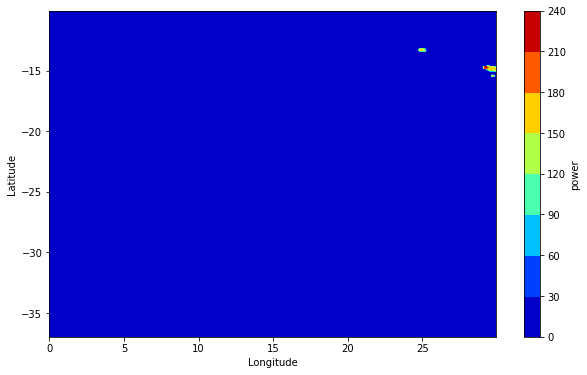

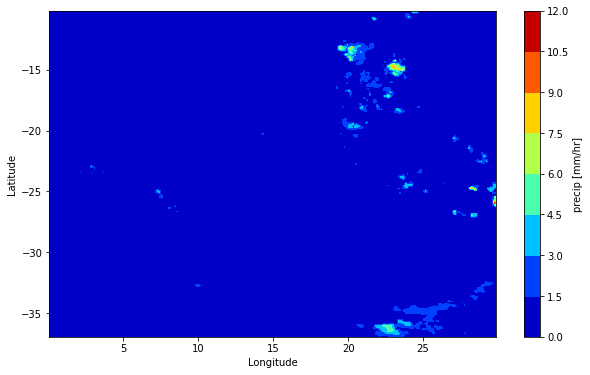

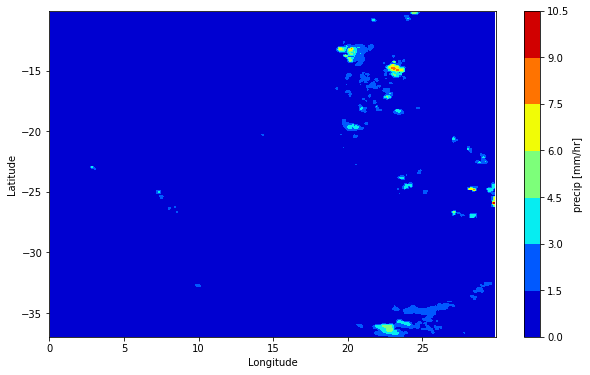

In [9]:
# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(X,Y,cores[:,:,1],cmap='jet')
plt.colorbar(label='power')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(lon_p,lat_p,precip[:,:,1],cmap='jet')#
plt.colorbar(label='precip [mm/hr]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# visualize core data at inherent grid/resol
plt.figure(figsize=(10,6))
plt.contourf(X,Y,regidded_precip[:,:,1],cmap='jet')#
plt.colorbar(label='precip [mm/hr]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
# find rainfall pixels collocated with cores
cores_1D = cores.flatten()
precip_1D = regidded_precip.flatten() # cores and precip have same size and indexing - obs in connis notebook
cores_ind_gt_0 = np.where(cores_1D>0)[0]
precip_collocated_w_cores = precip_1D[cores_ind_gt_0] #dat in connis notebook
print(precip_collocated_w_cores.shape)
print(max(precip_collocated_w_cores))

(1709807,)
45.72334661547247


In [11]:
# calculate frequency of rainfall above a threshold 
# dat = 
# threshold = 30mm/hr

def calc_treshReached(dat, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.isfinite(dat))

In [12]:
# calculate frequency of rainfall above a threshold relative to the same frequency for the full rainfall field (native)

def calc_treshReached_vsObs(dat, obs, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.isfinite(dat)) / np.sum(np.array(obs)>thresh)/np.sum(np.isfinite(obs))

In [13]:
# calculate fraction of caught rainfall pixels above a threshold
# calc_treshMissed in connis script

def calc_treshcaught(dat, obs, thresh):
    return np.sum(np.array(dat)>thresh)/np.sum(np.array(obs)>thresh)

In [14]:
# calculate frequency of rainfall above a threshold for regions with wavelet power above a given percentile

def percentile(dat, wav, thresh, perc):
    pval = np.percentile(wav, perc)
    dats = np.array(dat)[np.array(wav)>=pval]
    return np.sum(dats>thresh)/np.sum(np.isfinite(dats))

In [15]:
# fraction of pixels where threshold exceeded
# dat = precip_collocated_w_cores
# obs = precip_1D
thresh = 20
# treached = calc_treshReached(precip_collocated_w_cores,thresh)
# print(treached)

In [16]:
# fraction of caught pixels
# tcaught = calc_treshcaught(precip_collocated_w_cores,precip_1D, thresh)
# print(tcaught)

In [17]:
# fraction of threshold reached in dat vs threshold reached in obs
tfrac = calc_treshReached_vsObs(precip_collocated_w_cores,precip_1D, thresh)
print(tfrac)

5.236803210354515e-18


Text(0.5, 0, 'intensity of rainfall [mm/hr]')

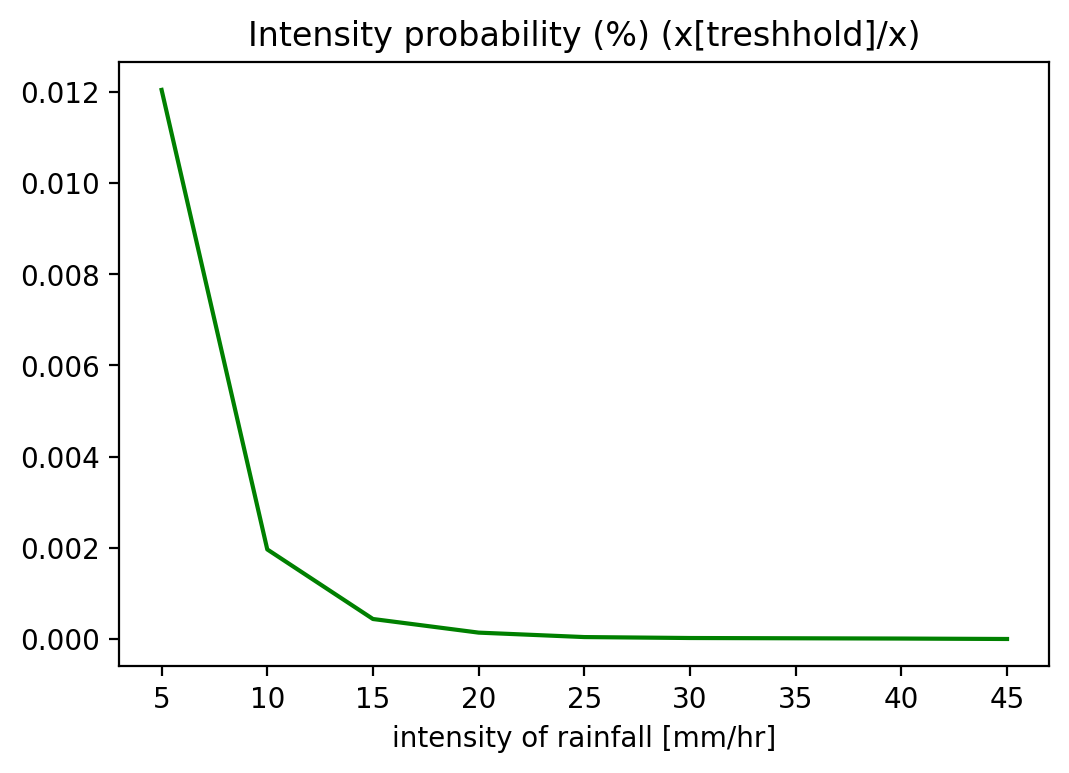

In [18]:
# fraction of rainfall pixels reached above intensity threshold to all rainfall pixels (collocated with cores)
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

treached = []
for intens in range(5,50,5):   
    cc = calc_treshReached(precip_collocated_w_cores, intens)
    treached.append(cc)

ax.plot(range(5,50,5), treached,color='green')
ax.set_title("Intensity probability (%) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')

Text(0.5, 0, 'intensity of rainfall [mm/hr]')

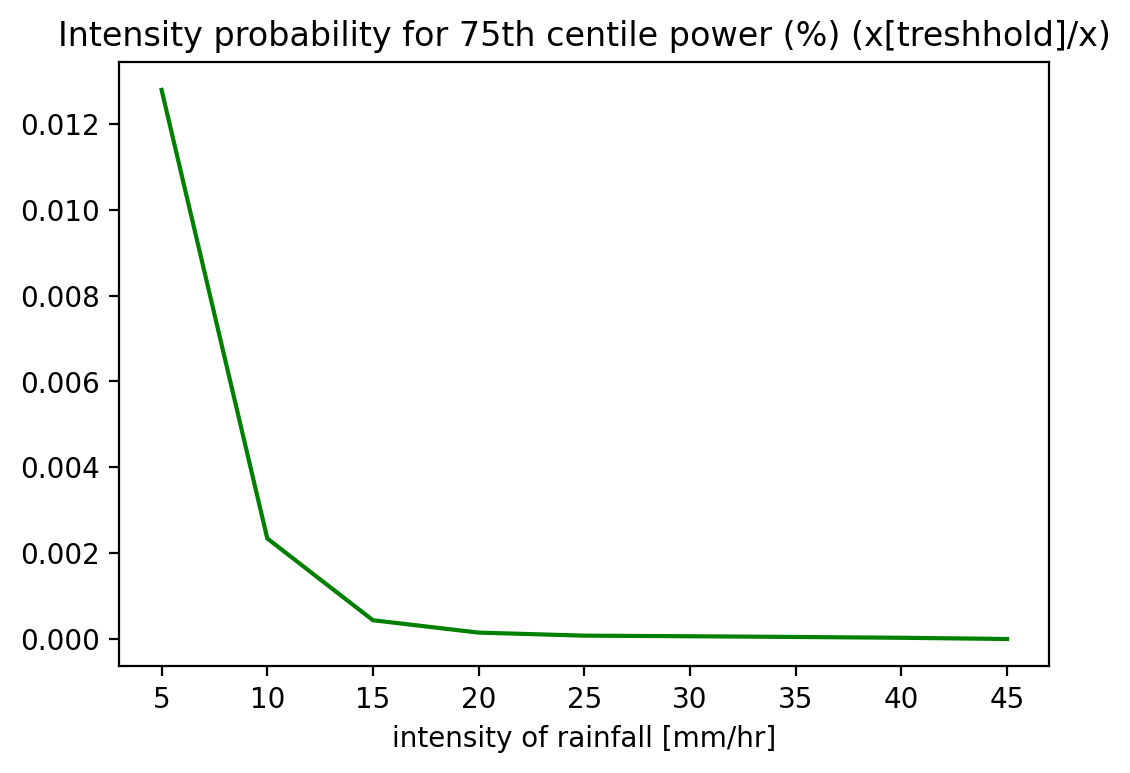

In [19]:
# plot frequency of caught pixels with rainfall above a threshold for regions with wavelet power above a given 
# percentile
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

treached = []
for intens in range(5,50,5):   
    cc = percentile(precip_collocated_w_cores, cores_1D[cores_ind_gt_0], intens, 75)
    treached.append(cc)
    #plotdic.append((treached,dat[1]))
#for pp in plotdic:    
#ax.plot(range(5,50,5), pp[0], label=pp[1])

ax.plot(range(5,50,5), treached,color='green')
ax.set_title("Intensity probability for 75th centile power (%) (x[treshhold]/x)")
plt.xlabel('intensity of rainfall [mm/hr]')
#ax.ylabel('fraction of rainfall pixels caught above intensity threshold that have >= 75th percentile wavelet power')
#plt.legend()
#f.savefig("/home/ck/DIR/cornkle/data/nflics/core_tests/"+'rainP_75p_wpower.jpg')

Text(0.5, 0, 'intensity of rainfall [mm/hr]')

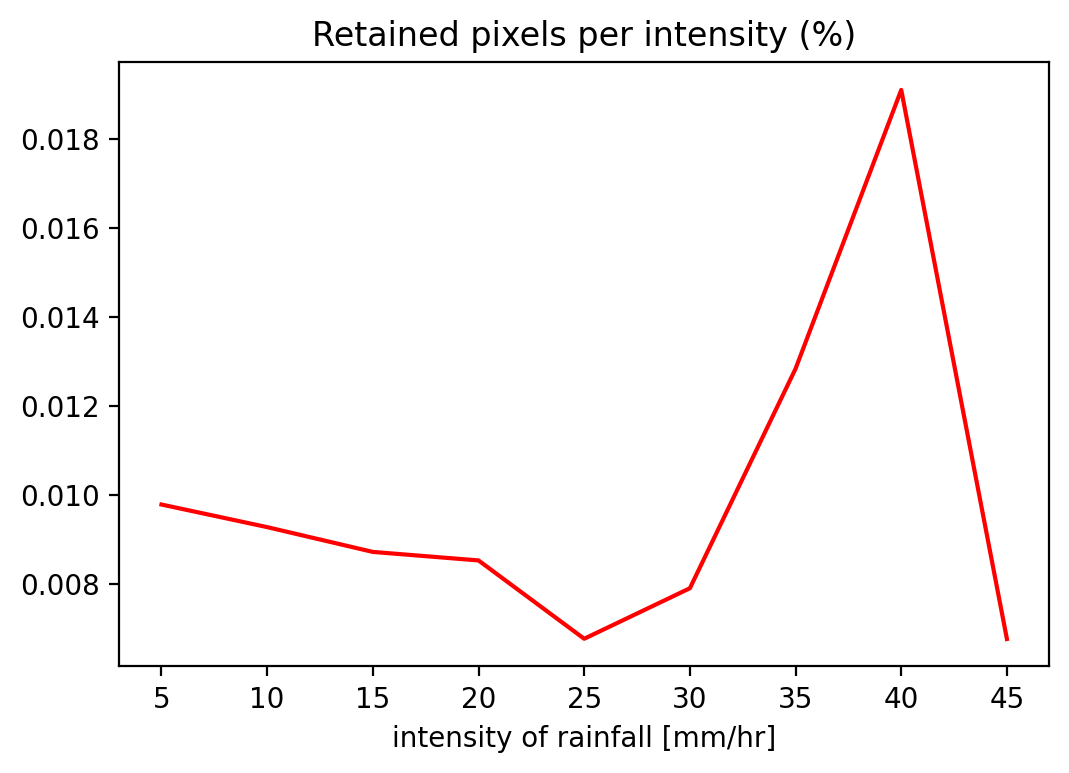

In [20]:
# fraction of rainfall pixels caught above intensity threshold to all caught rainfall pixels
f = plt.figure(figsize=(6,4), dpi=200)
ax = f.add_subplot(111)

tcaught = []
for intens in range(5,50,5):   
    cc = calc_treshcaught(precip_collocated_w_cores, precip_1D, intens)
    tcaught.append(cc)

ax.plot(range(5,50,5), tcaught,color='red')
ax.set_title("Retained pixels per intensity (%)")
plt.xlabel('intensity of rainfall [mm/hr]')
#f.savefig("/home/ck/DIR/cornkle/data/nflics/core_tests/"+'_missedCases_southernAfricaDomain.jpg')   

In [21]:
# read cores daily data
#core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/06/201006081045.nc'
#core_filename = '/prj/Africa_cloud/ch9_wavelet/2010/',month,'/201006081045.nc'
#core_data = nc.Dataset(core_filename,'r')
#print(core_data)
#cores_temp = np.array(core_data.variables['cores'])
#cores = np.array(core_data.variables['cores'])
#time = core_data.variables['time'][:]

#cores = cores.append(cores_temp)
# make a lat x lon x time dataset for monthly cores
#global_attributes = core_data.__dict__


# read precip data
#precip_filename = '/prj/global_water/MCS_Feng/global_v2/2d_fields/'
#precip_data = nc.Dataset(precip_filename,'r')

# visualize core data at inherent grid/resol
#plt.figure(figsize=(10,6))
#plt.contourf(X,Y,np.max(cores,axis=2),cmap='jet')
#plt.colorbar(label='power')
#plt.title(cores.time)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

# visualize regridded data
# plt.figure(figsize=(10,6))
#plt.contourf(X_new,Y_new,A,cmap='jet')
#plt.colorbar(label='power')
#plt.title(cores.time)
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

In [22]:
# replace with precip data grid - bring coarse precip data (0.1) to fine core grid (0.04)
#new_lat = np.linspace(min(lat),max(lat),2000)#(lat[2]-lat[1])*2)
#new_lon = np.linspace(min(lon),max(lon),1900)#(lat[2]-lat[1])*2)
#X_new, Y_new = np.meshgrid(new_lon,new_lat)
#A = regrid_irregular_quick(lat_p,lon_p,lon,lat,cores_temp)
#regidded_precip[:,:,l] = A    